In [76]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load the (preprocessed) CIFAR10 data.
DIR_CS231n = '/Users/cthorey/Documents/MLearning/CS231/assignment2/'
data = get_CIFAR10_data(DIR_CS231n)
for k, v in data.iteritems():
  print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


# Sanity check 1 

In [84]:
model = FirstConvNet(use_batchnorm=True)

N = 50
X = np.random.randn(N, 3, 32, 32)
y = np.random.randint(10, size=N)

loss, grads = model.loss(X, y)
print 'Initial loss (no regularization): ', loss

model.reg = 1.0
loss, grads = model.loss(X, y)
print 'Initial loss (with regularization): ', loss

Initial loss (no regularization):  2.30279220581
Initial loss (with regularization):  2.41372352066


## Sanity check 2 - Gradietn check 

In [86]:
num_inputs = 2
input_dim = (3, 12, 12)
reg = 0.0
num_classes = 10
X = np.random.randn(num_inputs, *input_dim)
y = np.random.randint(num_classes, size=num_inputs)

model = FirstConvNet(input_dim=input_dim,
                     dtype=np.float64,
                     num_filters = [3],
                     hidden_dims = [3,3],use_batchnorm = True)
loss, grads = model.loss(X, y)
for param_name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    param_grad_num = eval_numerical_gradient(f, model.params[param_name], verbose=False, h=1e-6)
    e = rel_error(param_grad_num, grads[param_name])
    print '%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

W1 max relative error: 2.091413e-07
W2 max relative error: 1.621251e-05
W3 max relative error: 1.878764e-06
W4 max relative error: 8.958335e-08
b1 max relative error: 2.602085e-10
b2 max relative error: 1.409463e-10
b3 max relative error: 0.000000e+00
b4 max relative error: 9.477910e-10
beta1 max relative error: 6.713451e-06
beta2 max relative error: 2.887573e-06
beta3 max relative error: 8.024927e-07
gamma1 max relative error: 1.004291e-05
gamma2 max relative error: 2.566997e-05
gamma3 max relative error: 2.243999e-05


## Sanity check 3 

In [87]:
num_train = 100
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

model = FirstConvNet(weight_scale=5e-2,use_batchnorm = False)

solver = Solver(model, small_data,
                num_epochs=20, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=1)
solver.train()

(Iteration 1 / 40) loss: 3.520571
(Epoch 0 / 20) train acc: 0.160000; val_acc: 0.126000
(Iteration 2 / 40) loss: 2.759281
(Epoch 1 / 20) train acc: 0.230000; val_acc: 0.125000
(Iteration 3 / 40) loss: 3.002659
(Iteration 4 / 40) loss: 2.511813
(Epoch 2 / 20) train acc: 0.200000; val_acc: 0.121000
(Iteration 5 / 40) loss: 2.335079
(Iteration 6 / 40) loss: 2.032216
(Epoch 3 / 20) train acc: 0.360000; val_acc: 0.119000
(Iteration 7 / 40) loss: 2.045021
(Iteration 8 / 40) loss: 1.852731
(Epoch 4 / 20) train acc: 0.380000; val_acc: 0.128000
(Iteration 9 / 40) loss: 1.905479
(Iteration 10 / 40) loss: 1.680210
(Epoch 5 / 20) train acc: 0.420000; val_acc: 0.144000
(Iteration 11 / 40) loss: 1.739118
(Iteration 12 / 40) loss: 1.679659
(Epoch 6 / 20) train acc: 0.520000; val_acc: 0.143000
(Iteration 13 / 40) loss: 1.662572
(Iteration 14 / 40) loss: 1.500263
(Epoch 7 / 20) train acc: 0.560000; val_acc: 0.143000
(Iteration 15 / 40) loss: 1.469790
(Iteration 16 / 40) loss: 1.135587
(Epoch 8 / 20) tr

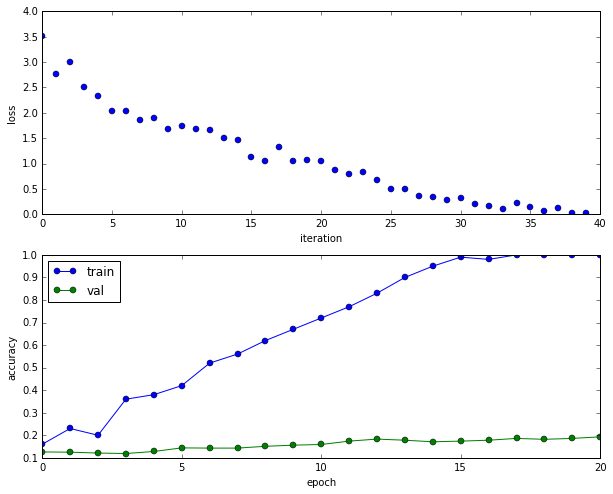

In [88]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## Test on the model 

In [ ]:
model_4 = FirstConvNet(weight_scale=5e-2, reg=0.01,
                       filter_size = 3,
                       
                       use_batchnorm=True,
                       num_filters=[16, 32, 64],
                       hidden_dims=[500, 500])

solver_4 = Solver(model_4, data,
                num_epochs=5, batch_size=50,
                lr_decay = 0.95,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=20)
solver_4.train()

(Iteration 1 / 4900) loss: 12.618173
(Epoch 0 / 5) train acc: 0.173000; val_acc: 0.161000
(Iteration 21 / 4900) loss: 10.715726
(Iteration 41 / 4900) loss: 9.354463
(Iteration 61 / 4900) loss: 8.834296
(Iteration 81 / 4900) loss: 7.888054
(Iteration 101 / 4900) loss: 6.735676
(Iteration 121 / 4900) loss: 6.122400
(Iteration 141 / 4900) loss: 5.609355
(Iteration 161 / 4900) loss: 4.996240
(Iteration 181 / 4900) loss: 4.528060
(Iteration 201 / 4900) loss: 4.361496

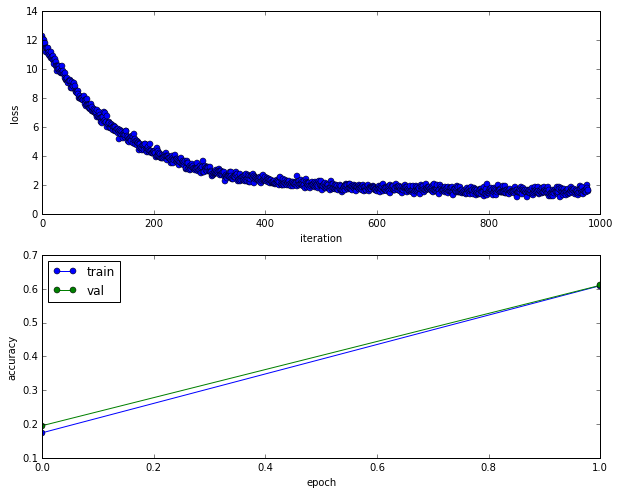

In [101]:
solver = solver_4
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [97]:
solver_4.best_val_acc

0.73799999999999999